# Cardiovascular Disease

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

In [2]:
sns.set()
sns.set_context(
    "notebook", 
    font_scale=1,       
    rc={ 
        "figure.figsize": (9, 6), 
        "axes.titlesize": 12 
    }
)

In [3]:
rcParams['figure.figsize'] = 9, 6

## Dataset

In [4]:
cvd = pd.read_csv('00.01_disease.csv')

| Feature | Variable Type | Variable | Value Type |
|-|-|-|-|
| Age | Objective | Feature | age | int (days) | 
| Height | Objective Feature | height | int (cm) | 
| Weight | Objective Feature | weight | float (kg) | 
| Gender | Objective Feature | gender | categorical code | 
| Systolic blood pressure | Examination Feature | ap_hi | int | 
| Diastolic blood pressure | Examination Feature | ap_lo | int | 
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | 
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | 
| Smoking | Subjective Feature | smoke | binary | 
| Alcohol intake | Subjective Feature | alco | binary | 
| Physical activity | Subjective Feature | active | binary | 
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 

In [5]:
cvd.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Preliminary Data Analysis

In [6]:
cvd_uniques = pd.melt(frame=cvd, value_vars=['gender',
                                             'cholesterol', 
                                             'gluc', 
                                             'smoke', 
                                             'alco', 
                                             'active', 
                                             'cardio'])

In [7]:
cvd_uniques = (pd.DataFrame(cvd_uniques.groupby(['variable', 'value'])['value'].count())
               .sort_index(level=[0, 1]) 
               .rename(columns={'value': 'count'}) 
               .reset_index())


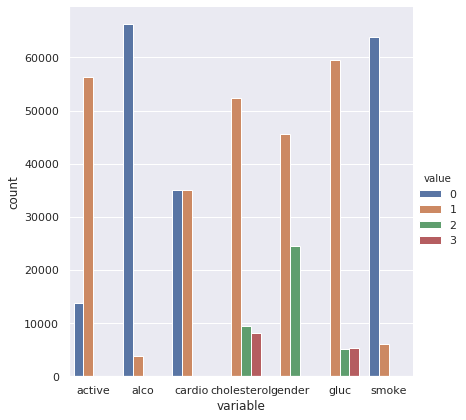

In [8]:
sns.catplot(x='variable', y='count', hue='value', data=cvd_uniques, kind='bar', height=6);

In [9]:
cvd_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


In [10]:
for c in cvd.columns:
    n = cvd[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(cvd[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


## How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

## Which gender more often reports consuming alcohol - men or women?

## What is the difference between the percentages of smokers among men and women (rounded)?

## What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.